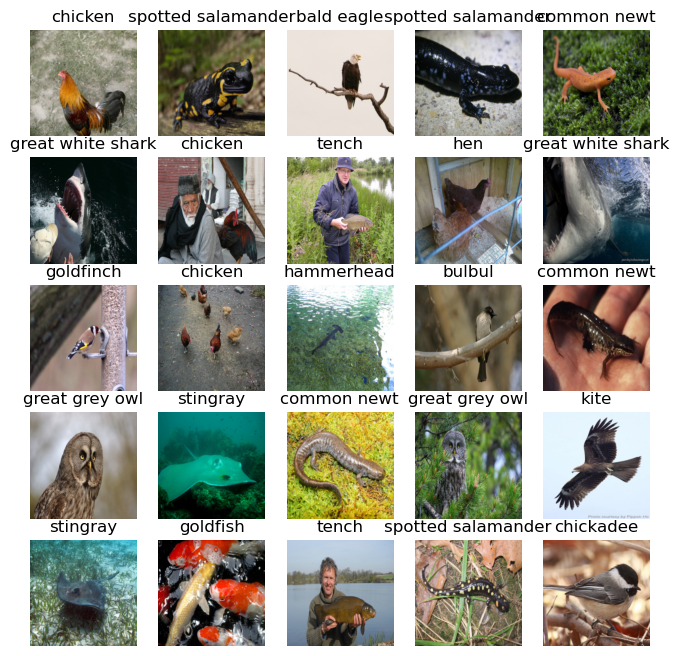

In [5]:
import torch
from torchvision.datasets import ImageFolder
from torchvision import transforms
from torch.utils.data import DataLoader
from torch.utils.data import random_split
from math import floor, ceil
import matplotlib.pyplot as plt
import numpy as np


# Data preprocessing
# The Following code was executed on local machine (not EC2 instances)
# The dataloaders themselves are light, I choose to use torch.load(dataloaders) for the EC2 VMs
# As long as the data is on the machines, and in the correct path relative to
# the dataloader objects, they should still function
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

combined_data = ImageFolder(root='data/train',
        transform=transform)

test_data = ImageFolder(root='data/test',
        transform=transform)

train_split = ceil(len(combined_data) * 0.80)
valid_split = floor(len(combined_data) * 0.20)

train_data, valid_data = random_split(combined_data, [train_split, valid_split])

# train_loader = DataLoader(training_data, batch_size=64, shuffle=False)
# valid_loader = DataLoader(validation_data, batch_size=64, shuffle=False)
# test_loader = DataLoader(test_data, batch_size=64, shuffle=False)

# torch.save(train_data, 'dataloaders/train_data.pt')
# torch.save(valid_data, 'dataloaders/valid_data.pt')
# torch.save(test_data, 'dataloaders/test_data.pt')


#Data Visualization
import json
labels_dict = {}
with open('data/labels.json') as labels_json:
    labels_dict = json.load(labels_json)

sorted_folder_list = list(sorted(labels_dict.keys()))

labels_map = {}
for i in range(20):
    labels_map[i] = labels_dict[sorted_folder_list[i]]


mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])
figure = plt.figure(figsize=(8, 8))
cols, rows = 5, 5
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_data), size=(1,)).item()
    img, label = train_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    img = img.numpy().transpose((1, 2, 0))
    img = std * img + mean
    img = np.clip(img, 0, 1)
    plt.imshow(img)
    #print(img.shape)
plt.savefig('results/DataVisualization3.png')
plt.show()